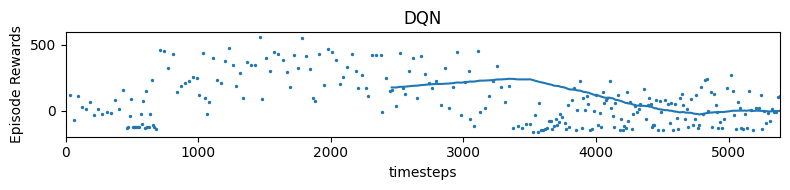

In [3]:
from stable_baselines3.common import results_plotter
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results

log_dir = "figures/"
timesteps = 30000
plot_results([log_dir], timesteps, results_plotter.X_TIMESTEPS, "DQN")

In [4]:
import re

# The input string with multiple blocks of data
s = '''
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.2     |
|    ep_rew_mean      | 44.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1        |
|    time_elapsed     | 83       |
|    total_timesteps  | 125      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.1      |
|    n_updates        | 6        |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.9     |
|    ep_rew_mean      | 29.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1        |
|    time_elapsed     | 166      |
|    total_timesteps  | 247      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.49     |
|    n_updates        | 36       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.9     |
|    ep_rew_mean      | 21.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12       |
|    fps              | 1        |
|    time_elapsed     | 248      |
|    total_timesteps  | 371      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.63     |
|    n_updates        | 67       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.3     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16       |
|    fps              | 1        |
|    time_elapsed     | 314      |
|    total_timesteps  | 469      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.38     |
|    n_updates        | 92       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.8     |
|    ep_rew_mean      | -2.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20       |
|    fps              | 1        |
|    time_elapsed     | 349      |
|    total_timesteps  | 516      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.27     |
|    n_updates        | 103      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23       |
|    ep_rew_mean      | -22.4    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24       |
|    fps              | 1        |
|    time_elapsed     | 376      |
|    total_timesteps  | 552      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.57     |
|    n_updates        | 112      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.3     |
|    ep_rew_mean      | -25.8    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 28       |
|    fps              | 1        |
|    time_elapsed     | 408      |
|    total_timesteps  | 597      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.49     |
|    n_updates        | 124      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.9     |
|    ep_rew_mean      | -26.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 32       |
|    fps              | 1        |
|    time_elapsed     | 438      |
|    total_timesteps  | 638      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.45     |
|    n_updates        | 134      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19       |
|    ep_rew_mean      | -27.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 36       |
|    fps              | 1        |
|    time_elapsed     | 470      |
|    total_timesteps  | 683      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.9     |
|    n_updates        | 145      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 16.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 40       |
|    fps              | 1        |
|    time_elapsed     | 555      |
|    total_timesteps  | 807      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.34     |
|    n_updates        | 176      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 32.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 44       |
|    fps              | 1        |
|    time_elapsed     | 637      |
|    total_timesteps  | 931      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.3      |
|    n_updates        | 207      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.6     |
|    ep_rew_mean      | 52.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 48       |
|    fps              | 1        |
|    time_elapsed     | 24       |
|    total_timesteps  | 1036     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.62     |
|    n_updates        | 233      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.3     |
|    ep_rew_mean      | 58.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 52       |
|    fps              | 1        |
|    time_elapsed     | 76       |
|    total_timesteps  | 1109     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.58     |
|    n_updates        | 252      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22       |
|    ep_rew_mean      | 77.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 56       |
|    fps              | 1        |
|    time_elapsed     | 159      |
|    total_timesteps  | 1233     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.57     |
|    n_updates        | 283      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.3     |
|    ep_rew_mean      | 87.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 60       |
|    fps              | 1        |
|    time_elapsed     | 232      |
|    total_timesteps  | 1339     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.96     |
|    n_updates        | 309      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.9     |
|    ep_rew_mean      | 107      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 64       |
|    fps              | 1        |
|    time_elapsed     | 315      |
|    total_timesteps  | 1463     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.8     |
|    n_updates        | 340      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.1     |
|    ep_rew_mean      | 119      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 68       |
|    fps              | 1        |
|    time_elapsed     | 390      |
|    total_timesteps  | 1574     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.56     |
|    n_updates        | 368      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.5     |
|    ep_rew_mean      | 131      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 72       |
|    fps              | 1        |
|    time_elapsed     | 472      |
|    total_timesteps  | 1694     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.99     |
|    n_updates        | 398      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.9     |
|    ep_rew_mean      | 146      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 76       |
|    fps              | 1        |
|    time_elapsed     | 553      |
|    total_timesteps  | 1814     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.16     |
|    n_updates        | 428      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.9     |
|    ep_rew_mean      | 151      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 80       |
|    fps              | 1        |
|    time_elapsed     | 623      |
|    total_timesteps  | 1914     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.6      |
|    n_updates        | 453      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.3     |
|    ep_rew_mean      | 161      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 84       |
|    fps              | 1        |
|    time_elapsed     | 25       |
|    total_timesteps  | 2038     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.67     |
|    n_updates        | 484      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.5     |
|    ep_rew_mean      | 168      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 88       |
|    fps              | 1        |
|    time_elapsed     | 105      |
|    total_timesteps  | 2156     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.9     |
|    n_updates        | 513      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.6     |
|    ep_rew_mean      | 170      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 92       |
|    fps              | 1        |
|    time_elapsed     | 178      |
|    total_timesteps  | 2264     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.66     |
|    n_updates        | 540      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.7     |
|    ep_rew_mean      | 178      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 96       |
|    fps              | 1        |
|    time_elapsed     | 254      |
|    total_timesteps  | 2375     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.68     |
|    n_updates        | 568      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.6     |
|    ep_rew_mean      | 176      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 100      |
|    fps              | 1        |
|    time_elapsed     | 311      |
|    total_timesteps  | 2459     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.38     |
|    n_updates        | 589      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.4     |
|    ep_rew_mean      | 182      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 104      |
|    fps              | 1        |
|    time_elapsed     | 381      |
|    total_timesteps  | 2562     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.7     |
|    n_updates        | 615      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.3     |
|    ep_rew_mean      | 193      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 108      |
|    fps              | 1        |
|    time_elapsed     | 462      |
|    total_timesteps  | 2680     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.99     |
|    n_updates        | 644      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.2     |
|    ep_rew_mean      | 202      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 112      |
|    fps              | 1        |
|    time_elapsed     | 540      |
|    total_timesteps  | 2796     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.5     |
|    n_updates        | 673      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.5     |
|    ep_rew_mean      | 209      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 116      |
|    fps              | 1        |
|    time_elapsed     | 623      |
|    total_timesteps  | 2920     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.88     |
|    n_updates        | 704      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.3     |
|    ep_rew_mean      | 220      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 120      |
|    fps              | 1        |
|    time_elapsed     | 29       |
|    total_timesteps  | 3043     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.11     |
|    n_updates        | 735      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.8     |
|    ep_rew_mean      | 228      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 124      |
|    fps              | 1        |
|    time_elapsed     | 86       |
|    total_timesteps  | 3128     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.03     |
|    n_updates        | 756      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.6     |
|    ep_rew_mean      | 237      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 128      |
|    fps              | 1        |
|    time_elapsed     | 171      |
|    total_timesteps  | 3252     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.06     |
|    n_updates        | 787      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.4     |
|    ep_rew_mean      | 241      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 132      |
|    fps              | 1        |
|    time_elapsed     | 255      |
|    total_timesteps  | 3377     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.9      |
|    n_updates        | 819      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.2     |
|    ep_rew_mean      | 238      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 136      |
|    fps              | 1        |
|    time_elapsed     | 341      |
|    total_timesteps  | 3504     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.59     |
|    n_updates        | 850      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.6     |
|    ep_rew_mean      | 218      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 140      |
|    fps              | 1        |
|    time_elapsed     | 389      |
|    total_timesteps  | 3572     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.65     |
|    n_updates        | 867      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27       |
|    ep_rew_mean      | 205      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 144      |
|    fps              | 1        |
|    time_elapsed     | 428      |
|    total_timesteps  | 3627     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.03     |
|    n_updates        | 881      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.4     |
|    ep_rew_mean      | 190      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 148      |
|    fps              | 1        |
|    time_elapsed     | 465      |
|    total_timesteps  | 3680     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.41     |
|    n_updates        | 894      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.2     |
|    ep_rew_mean      | 181      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 152      |
|    fps              | 1        |
|    time_elapsed     | 501      |
|    total_timesteps  | 3730     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.51     |
|    n_updates        | 907      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.5     |
|    ep_rew_mean      | 166      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 156      |
|    fps              | 1        |
|    time_elapsed     | 540      |
|    total_timesteps  | 3786     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.23     |
|    n_updates        | 921      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.1     |
|    ep_rew_mean      | 157      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 160      |
|    fps              | 1        |
|    time_elapsed     | 584      |
|    total_timesteps  | 3847     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.66     |
|    n_updates        | 936      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.4     |
|    ep_rew_mean      | 142      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 164      |
|    fps              | 1        |
|    time_elapsed     | 624      |
|    total_timesteps  | 3904     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.72     |
|    n_updates        | 950      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.8     |
|    ep_rew_mean      | 130      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 168      |
|    fps              | 1        |
|    time_elapsed     | 661      |
|    total_timesteps  | 3957     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.16     |
|    n_updates        | 964      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.2     |
|    ep_rew_mean      | 116      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 172      |
|    fps              | 1        |
|    time_elapsed     | 9        |
|    total_timesteps  | 4012     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.93     |
|    n_updates        | 977      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.5     |
|    ep_rew_mean      | 99.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 176      |
|    fps              | 1        |
|    time_elapsed     | 43       |
|    total_timesteps  | 4061     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.17     |
|    n_updates        | 990      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22       |
|    ep_rew_mean      | 94.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 180      |
|    fps              | 1        |
|    time_elapsed     | 82       |
|    total_timesteps  | 4115     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.11     |
|    n_updates        | 1003     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 79.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 184      |
|    fps              | 1        |
|    time_elapsed     | 115      |
|    total_timesteps  | 4162     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.3      |
|    n_updates        | 1015     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 62.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 188      |
|    fps              | 1        |
|    time_elapsed     | 152      |
|    total_timesteps  | 4212     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.3      |
|    n_updates        | 1027     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.9     |
|    ep_rew_mean      | 53.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 192      |
|    fps              | 1        |
|    time_elapsed     | 182      |
|    total_timesteps  | 4255     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.24     |
|    n_updates        | 1038     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.3     |
|    ep_rew_mean      | 37.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 196      |
|    fps              | 1        |
|    time_elapsed     | 248      |
|    total_timesteps  | 4305     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.34     |
|    n_updates        | 1051     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.2     |
|    ep_rew_mean      | 33.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 200      |
|    fps              | 1        |
|    time_elapsed     | 299      |
|    total_timesteps  | 4377     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.73     |
|    n_updates        | 1069     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 26.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 204      |
|    fps              | 1        |
|    time_elapsed     | 330      |
|    total_timesteps  | 4421     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.04     |
|    n_updates        | 1080     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 11.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 208      |
|    fps              | 1        |
|    time_elapsed     | 363      |
|    total_timesteps  | 4467     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.7      |
|    n_updates        | 1091     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 2.89     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 212      |
|    fps              | 1        |
|    time_elapsed     | 401      |
|    total_timesteps  | 4521     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.9     |
|    n_updates        | 1105     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | -4.05    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 216      |
|    fps              | 1        |
|    time_elapsed     | 442      |
|    total_timesteps  | 4580     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.34     |
|    n_updates        | 1119     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.9     |
|    ep_rew_mean      | -13.8    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 220      |
|    fps              | 1        |
|    time_elapsed     | 479      |
|    total_timesteps  | 4632     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.57     |
|    n_updates        | 1132     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | -15.4    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 224      |
|    fps              | 1        |
|    time_elapsed     | 517      |
|    total_timesteps  | 4686     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.11     |
|    n_updates        | 1146     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | -24.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 228      |
|    fps              | 1        |
|    time_elapsed     | 556      |
|    total_timesteps  | 4742     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.49     |
|    n_updates        | 1160     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | -26.8    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 232      |
|    fps              | 1        |
|    time_elapsed     | 630      |
|    total_timesteps  | 4791     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.02     |
|    n_updates        | 1172     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | -17.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 236      |
|    fps              | 0        |
|    time_elapsed     | 977      |
|    total_timesteps  | 4845     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.87     |
|    n_updates        | 1186     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | -13.1    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 240      |
|    fps              | 0        |
|    time_elapsed     | 1334     |
|    total_timesteps  | 4900     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.15     |
|    n_updates        | 1199     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | -10.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 244      |
|    fps              | 0        |
|    time_elapsed     | 1638     |
|    total_timesteps  | 4947     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.56     |
|    n_updates        | 1211     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.5     |
|    ep_rew_mean      | -1.62    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 248      |
|    fps              | 0        |
|    time_elapsed     | 178      |
|    total_timesteps  | 5028     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.93     |
|    n_updates        | 1231     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.5     |
|    ep_rew_mean      | 0.366    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 252      |
|    fps              | 0        |
|    time_elapsed     | 535      |
|    total_timesteps  | 5084     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.3      |
|    n_updates        | 1245     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.5     |
|    ep_rew_mean      | -1.57    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 256      |
|    fps              | 0        |
|    time_elapsed     | 867      |
|    total_timesteps  | 5134     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.9      |
|    n_updates        | 1258     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | -1.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 260      |
|    fps              | 0        |
|    time_elapsed     | 1362     |
|    total_timesteps  | 5205     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.8      |
|    n_updates        | 1276     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | -3.21    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 264      |
|    fps              | 0        |
|    time_elapsed     | 1798     |
|    total_timesteps  | 5266     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.66     |
|    n_updates        | 1291     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | -5.24    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 268      |
|    fps              | 0        |
|    time_elapsed     | 2216     |
|    total_timesteps  | 5324     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.97     |
|    n_updates        | 1305     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | -1.84    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 272      |
|    fps              | 0        |
|    time_elapsed     | 2474     |
|    total_timesteps  | 5386     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11       |
|    n_updates        | 1321     |
----------------------------------

'''

# Split the input string into a list of blocks
blocks = s.split('----------------------------------')

# Initialize an empty list to store the data
data = []

# Loop over the blocks
for block in blocks:
    # Extract the numerical values using regular expressions
    values = re.findall(r'\|\s*[a-z_]+\s*\|\s*(\d+\.?\d*)\s*\|', block)

    # If there are values in the block, convert them to floats and add them to the data list
    if values:
        values = [float(v) for v in values]
        data.append(tuple(values))

# Print the result
print(data)


[(31.2, 44.6, 0.05, 4.0, 1.0, 83.0, 125.0, 0.0001, 5.1, 6.0), (30.9, 29.5, 0.05, 8.0, 1.0, 166.0, 247.0, 0.0001, 3.49, 36.0), (30.9, 21.2, 0.05, 12.0, 1.0, 248.0, 371.0, 0.0001, 4.63, 67.0), (29.3, 10.1, 0.05, 16.0, 1.0, 314.0, 469.0, 0.0001, 4.38, 92.0), (25.8, 0.05, 20.0, 1.0, 349.0, 516.0, 0.0001, 3.27, 103.0), (23.0, 0.05, 24.0, 1.0, 376.0, 552.0, 0.0001, 3.57, 112.0), (21.3, 0.05, 28.0, 1.0, 408.0, 597.0, 0.0001, 5.49, 124.0), (19.9, 0.05, 32.0, 1.0, 438.0, 638.0, 0.0001, 9.45, 134.0), (19.0, 0.05, 36.0, 1.0, 470.0, 683.0, 0.0001, 10.9, 145.0), (20.2, 16.9, 0.05, 40.0, 1.0, 555.0, 807.0, 0.0001, 4.34, 176.0), (21.2, 32.6, 0.05, 44.0, 1.0, 637.0, 931.0, 0.0001, 8.3, 207.0), (21.6, 52.1, 0.05, 48.0, 1.0, 24.0, 1036.0, 0.0001, 2.62, 233.0), (21.3, 58.5, 0.05, 52.0, 1.0, 76.0, 1109.0, 0.0001, 3.58, 252.0), (22.0, 77.4, 0.05, 56.0, 1.0, 159.0, 1233.0, 0.0001, 4.57, 283.0), (22.3, 87.5, 0.05, 60.0, 1.0, 232.0, 1339.0, 0.0001, 1.96, 309.0), (22.9, 107.0, 0.05, 64.0, 1.0, 315.0, 1463.0, 0

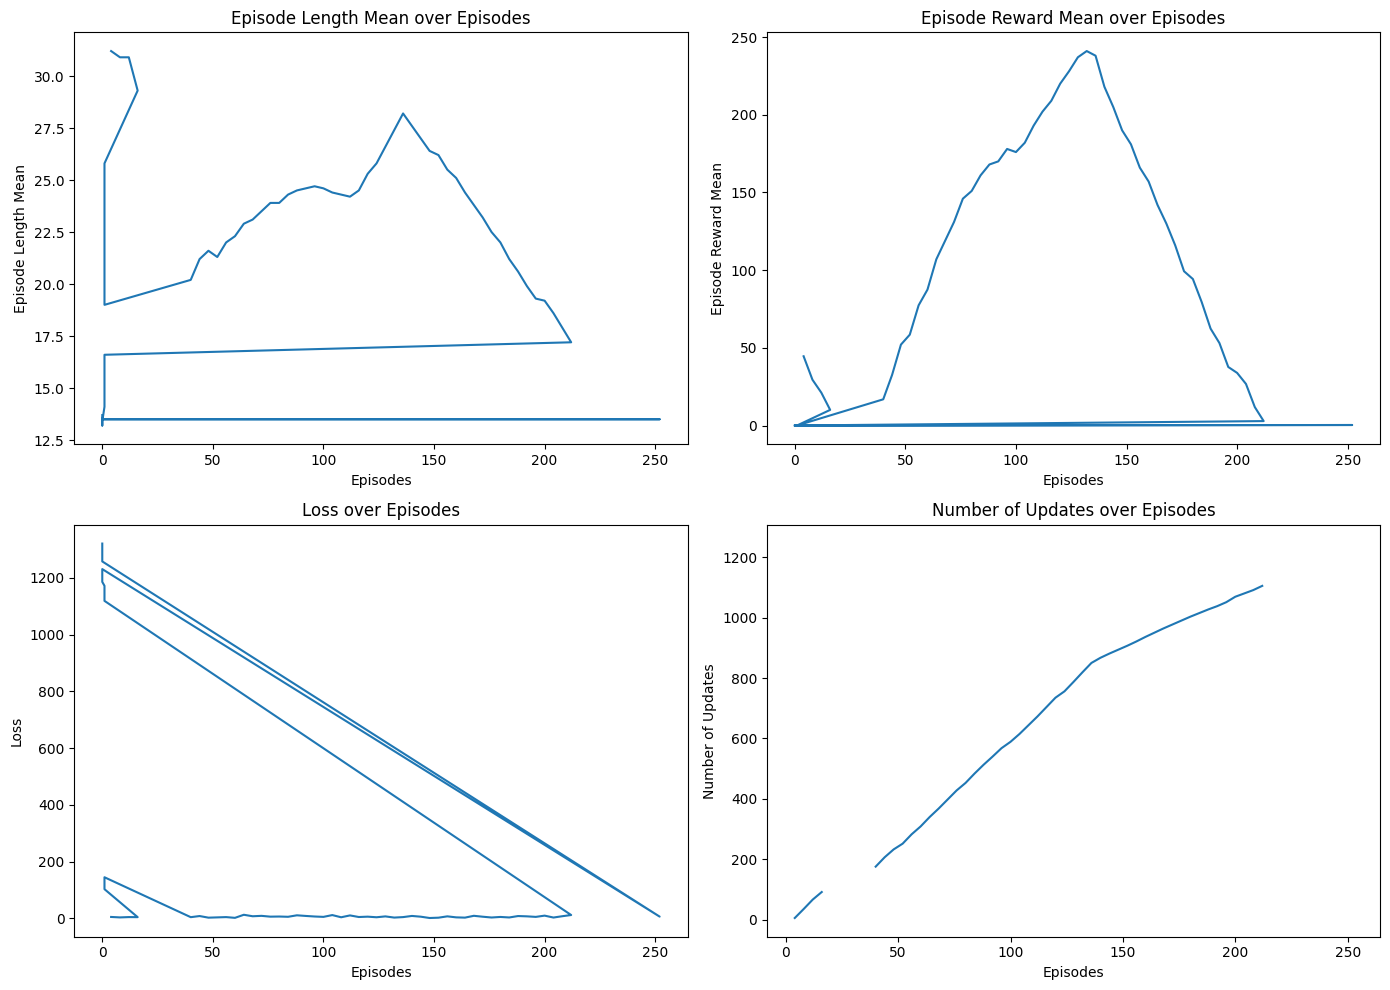

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a DataFrame
columns = ["ep_len_mean", "ep_rew_mean", "exploration_rate", "episodes", "fps","time_elapsed", "total_timesteps", "learning_rate", "loss", "n_updates"]
df = pd.DataFrame(data, columns=columns)

# Plotting
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(df["episodes"], df["ep_len_mean"])
plt.title("Episode Length Mean over Episodes")
plt.xlabel("Episodes")
plt.ylabel("Episode Length Mean")

plt.subplot(2, 2, 2)
plt.plot(df["episodes"], df["ep_rew_mean"])
plt.title("Episode Reward Mean over Episodes")
plt.xlabel("Episodes")
plt.ylabel("Episode Reward Mean")

plt.subplot(2, 2, 3)
plt.plot(df["episodes"], df["loss"])
plt.title("Loss over Episodes")
plt.xlabel("Episodes")
plt.ylabel("Loss")

plt.subplot(2, 2, 4)
plt.plot(df["episodes"], df["n_updates"])
plt.title("Number of Updates over Episodes")
plt.xlabel("Episodes")
plt.ylabel("Number of Updates")

plt.tight_layout()
plt.show()